In [1]:
# install mujoco + robosuite
!pip install PyOpenGL ffmpeg
!pip install robosuite
!pip install mujoco
!pip install ffmpeg
!pip install robosuite imageio
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# !pip install mujoco==3.3.7


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install moderngl


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import mujoco

In [4]:
import robosuite as suite


[robosuite WARNING] No private macro file found! (macros.py:53)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:54)
[robosuite WARNING] To setup, run: python c:\Users\SauravUpadhyaya\Desktop\deeplearning_third_project\robotic-arm-lifting-object-in-noisy-environment\.venv\Lib\site-packages\robosuite/scripts/setup_macros.py (macros.py:55)
[robosuite WARNING] Could not import robosuite_models. Some robots may not be available. If you want to use these robots, please install robosuite_models from source (https://github.com/ARISE-Initiative/robosuite_models) or through pip install. (__init__.py:30)
[robosuite WARNING] Could not load the mink-based whole-body IK. Make sure you install related import properly, otherwise you will not be able to use the default IK controller setting for GR1 robot. (__init__.py:40)


In [6]:
print(mujoco.__path__)

['c:\\Users\\SauravUpadhyaya\\Desktop\\deeplearning_third_project\\robotic-arm-lifting-object-in-noisy-environment\\.venv\\Lib\\site-packages\\mujoco']


In [5]:
!pip show mujoco

Name: mujoco
Version: 3.3.7
Summary: MuJoCo Physics Simulator
Home-page: https://github.com/google-deepmind/mujoco
Author: 
Author-email: Google DeepMind <mujoco@deepmind.com>
License: 
Location: C:\Users\SauravUpadhyaya\desktop\deeplearning_third_project\robotic-arm-lifting-object-in-noisy-environment\.venv\Lib\site-packages
Requires: absl-py, etils, glfw, numpy, pyopengl
Required-by: mink, robosuite


In [7]:
import os
import numpy as np
import imageio

from robosuite.controllers.composite.composite_controller_factory import load_composite_controller_config
import re
from typing import Sequence, Optional, Tuple

In [8]:
# '''
# Code in this cell is needed for preheat render. Otherwise, the camera image is buggy.
# '''
# # -------- Controller config --------
# controller_config = load_composite_controller_config("BASIC", robot="Panda")
# # import os
# # os.environ["MUJOCO_GL"] = "wgl"
# # -------- Create env (use default placement initializer) --------
# env = suite.make(
#     env_name="Lift",
#     robots="Panda",
#     has_renderer=False,
#     has_offscreen_renderer=True,
#     use_camera_obs=False,
#     render_camera="frontview",
#     controller_configs=controller_config,
# )
# obs = env.reset()

# W, H = 640, 480
# # physics preheat
# for _ in range(10):
#     env.step(np.zeros(7))

# # render preheat
# for _ in range(5):
#     _ = env.sim.render(W, H, camera_name="frontview")
# obs = env.reset()

import numpy as np 
import robosuite as suite
from robosuite.controllers import load_composite_controller_config
# import os  <-- This line is now optional as we modified the source code
# os.environ["MUJOCO_GL"] = "wgl" <-- This line is also optional now

# -------- Controller config --------
controller_config = load_composite_controller_config("BASIC", robot="Panda")
import os
os.environ["MUJOCO_GL"] = "wgl" # Set this first
# -------- Create env (use default placement initializer) --------
env = suite.make(
    env_name="Lift",
    robots="Panda",
    has_renderer=False,
    has_offscreen_renderer=True, # This will now use WGL instead of EGL
    use_camera_obs=False,
    render_camera="frontview",
    controller_configs=controller_config,
)
obs = env.reset()

W, H = 640, 480
# physics preheat
for _ in range(10):
    env.step(np.zeros(7))

# render preheat
for _ in range(5):
    _ = env.sim.render(W, H, camera_name="frontview")
    
obs = env.reset()
print("Environment creation and rendering preheat successful!")

[robosuite INFO] Loading controller configuration from: c:\Users\SauravUpadhyaya\Desktop\deeplearning_third_project\robotic-arm-lifting-object-in-noisy-environment\.venv\Lib\site-packages\robosuite\controllers\config\default\composite\basic.json (composite_controller_factory.py:121)
[robosuite WARNING] The config has defined for the controller "left", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for left from self.part_controller_config. (robot.py:151)
[robosuite WARNING] The config has defined for the controller "torso", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for torso from self.part_controller_config. (robot.py:151)
[robosuite WARNING] The config has defined for the controller "head", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for head from self.part_controller_confi

Environment creation and rendering preheat successful!


### End of setup code

---
---



### Create the robotic environment

[robosuite INFO] Loading controller configuration from: c:\Users\SauravUpadhyaya\Desktop\deeplearning_third_project\robotic-arm-lifting-object-in-noisy-environment\.venv\Lib\site-packages\robosuite\controllers\config\default\composite\basic.json (composite_controller_factory.py:121)
[robosuite WARNING] The config has defined for the controller "left", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for left from self.part_controller_config. (robot.py:151)
[robosuite WARNING] The config has defined for the controller "torso", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for torso from self.part_controller_config. (robot.py:151)
[robosuite WARNING] The config has defined for the controller "head", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for head from self.part_controller_confi

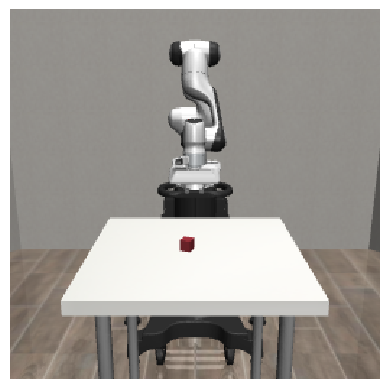

noisy: [ 0.02011651 -0.02967722  0.8312804 ]  true: [ 0.02011651 -0.02967722  0.8197373 ]


In [9]:
# create env
from utils import NoisyBlockObsWrapper, make_noisy_lift_env
env = make_noisy_lift_env(add_noise=False, image_size=(256, 256))
obs = env.reset()

import matplotlib.pyplot as plt
plt.imshow(obs["frontview_image"], interpolation="nearest")
plt.axis("off"); plt.show()

# show noisy obs and real b
noisy = obs["cube_pos_noisy"]
obs, r, d, info = env.step(np.zeros(env.action_dim))
print("noisy:", noisy, " true:", info["cube_pos_true"])

In [10]:
!pip install imageio-ffmpeg



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Waypoint-based policy

In [13]:
from IPython.display import Video

from utils import (
    init_frames_dir,
    save_frame,
    step_with_action,
    move_ee_to,
    is_lift_success,
)


# --- Get image size from a fresh reset ---
obs = env.reset()
cam_name = "frontview"
cam_key = f"{cam_name}_image"
assert cam_key in obs, (
    f"Missing {cam_key} in obs. Make sure use_camera_obs=True and "
    f"camera_names includes '{cam_name}'."
)
cube_start_pos = np.asarray(obs["cube_pos_noisy"], dtype=float).copy()

H, W = obs[cam_key].shape[:2]  # Used later when exporting the video

# --- Prepare / clear frame directory ---
init_frames_dir("frames")

action_dim = env.action_dim
print("action_dim =", action_dim)

frame_id = 0

# --- Save first frame ---
frame_id = save_frame(obs, cam_key, frame_id, frames_dir="frames")


# --- Waypoint offsets in world frame ---
above_height = 0.15  # 15 cm above cube
grasp_height = 0.02  # (optional) fine adjustment
lift_height = 0.25   # lift height after grasp

# --- Build waypoints once from the noisy cube measurement ---
cube_pos_meas = np.asarray(obs["cube_pos_noisy"], dtype=float).copy()

target_above = cube_pos_meas.copy()
target_above[2] += above_height

target_grasp = cube_pos_meas.copy()
# target_grasp[2] += grasp_height  # enable if you want to offset the grasp height

target_lift = cube_pos_meas.copy()
target_lift[2] += lift_height

# ----------------------------------------------------------------
# Scripted policy: Above → Down → Close → Lift (using fixed noisy targets)
# ----------------------------------------------------------------

print("Phase 0: open gripper")
action_open = np.zeros(action_dim, dtype=float)
action_open[-1] = -1.0
obs, frame_id = step_with_action(
    env,
    action_open,
    n_steps=20,
    obs=obs,
    cam_key=cam_key,
    frame_id=frame_id,
    frames_dir="frames",
)

print("Phase 1: move above cube (noisy target)")
obs, frame_id = move_ee_to(
    env,
    obs,
    target_pos_or_fn=target_above,
    gripper=-1.0,
    steps=100,
    action_dim=action_dim,
    cam_key=cam_key,
    frame_id=frame_id,
    frames_dir="frames",
    kp=8.0,
    ki=0.0,
    kd=1.0,
    max_delta=0.1,
)

print("Phase 2: move down to grasp height (noisy target)")
obs, frame_id = move_ee_to(
    env,
    obs,
    target_pos_or_fn=target_grasp,
    gripper=-1.0,
    steps=250,
    action_dim=action_dim,
    cam_key=cam_key,
    frame_id=frame_id,
    frames_dir="frames",
    kp=[10.0, 10.0, 12.0],
    ki=0.0,
    kd=0.2,
    max_delta=0.1,
)

print("Phase 3: close gripper")
action_close = np.zeros(action_dim, dtype=float)
action_close[-1] = 1.0
obs, frame_id = step_with_action(
    env,
    action_close,
    n_steps=40,
    obs=obs,
    cam_key=cam_key,
    frame_id=frame_id,
    frames_dir="frames",
)

print("Phase 4: lift cube (noisy target)")
obs, frame_id = move_ee_to(
    env,
    obs,
    target_pos_or_fn=target_lift,
    gripper=1.0,
    steps=200,
    action_dim=action_dim,
    cam_key=cam_key,
    frame_id=frame_id,
    frames_dir="frames",
    kp=10.0,
    ki=0.0,
    kd=1.0,
    max_delta=0.1,
)

print("Phase 5: hold")
obs, frame_id = step_with_action(
    env,
    np.zeros(action_dim, dtype=float),
    n_steps=40,
    obs=obs,
    cam_key=cam_key,
    frame_id=frame_id,
    frames_dir="frames",
)

print("Scripted rollout finished. Frames saved to ./frames")

# --- Export video at native resolution (avoid scaling blur) ---
!ffmpeg -y -framerate 20 -i frames/frame_%04d.png -c:v libx264 -pix_fmt yuv420p controller_demo.mp4

# Inline preview (e.g., in Colab / Jupyter)
Video("controller_demo.mp4", embed=True, width=W)

[robosuite WARNING] The config has defined for the controller "left", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for left from self.part_controller_config. (robot.py:151)
[robosuite WARNING] The config has defined for the controller "torso", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for torso from self.part_controller_config. (robot.py:151)
[robosuite WARNING] The config has defined for the controller "head", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for head from self.part_controller_config. (robot.py:151)
[robosuite WARNING] The config has defined for the controller "base", but the robot does not have this component. Skipping, but make sure this is intended.Removing the controller config for base from self.part_controller_config. (robot.py:151)
[robosuite WARNING] Th

action_dim = 7
Phase 0: open gripper
Phase 1: move above cube (noisy target)
Phase 2: move down to grasp height (noisy target)
Phase 3: close gripper
Phase 4: lift cube (noisy target)
Phase 5: hold
Scripted rollout finished. Frames saved to ./frames


ffmpeg version 8.0.1-essentials_build-www.gyan.dev Copyright (c) 2000-2025 the FFmpeg developers
  built with gcc 15.2.0 (Rev8, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-dxva2 --enable-d3d11va --enable-d3d12va --enable-ffnvcodec --enable-libvpl --enable-nvdec --enable-nvenc --enable-vaapi --enable-openal --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --ena

In [14]:
!ffmpeg -version


ffmpeg version 8.0.1-essentials_build-www.gyan.dev Copyright (c) 2000-2025 the FFmpeg developers
built with gcc 15.2.0 (Rev8, Built by MSYS2 project)
configuration: --enable-gpl --enable-version3 --enable-static --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-dxva2 --enable-d3d11va --enable-d3d12va --enable-ffnvcodec --enable-libvpl --enable-nvdec --enable-nvenc --enable-vaapi --enable-openal --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-

### Test whether the task is completed successfully.

In [15]:
success = is_lift_success(
    obs,
    cube_start_pos=cube_start_pos,
    min_lift=0.10,     # e.g., require 10 cm lift
    max_xy_shift=0.1, # allow up to 10 cm XY drift
    use_noisy=True,    # we are using noisy cube pos from wrapper
)

print("Lift success:", success)

Lift success: True
